# **Installation and import of prerequisite packages**

In [1]:
pip install pandas

In [2]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 41.0 MB/s 
     |████████████████████████████████| 6.3 MB 43.8 MB/s 


In [3]:
import pandas as pd

# **Data gathering**

Data have been gathered by Office for National Statistics and related academic work that has already been done.

In [4]:
df = pd.read_excel('Local_authority.xlsx')

In [5]:
df = df.drop(['Return to Notes Page'], axis=1)

In [6]:
df.columns = ['PHE_Centre', 'LA_code' , 'LA_name', 'Count_of_outlets' ,'Rate_per_100,000_population']

In [7]:
df

,PHE_Centre,LA_code,LA_name,Count_of_outlets,"Rate_per_100,000_population"
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,PHE Centre,LA code,LA name,Count of outlets,"Rate per 100,000 population"
3,East Midlands,E07000032,Amber Valley,97,78.262413
4,East Midlands,E07000170,Ashfield,104,84.892415
...,...,...,...,...,...
325,Yorkshire and Humber,E08000019,Sheffield,660,117.073378
326,Yorkshire and Humber,E08000036,Wakefield,396,119.500632
327,Yorkshire and Humber,E06000014,York,202,98.806979
328,NaN,NaN,NaN,NaN,NaN


In [8]:
df= df.iloc[3:, :]

In [9]:
df= df.iloc[:-2]
df

,PHE_Centre,LA_code,LA_name,Count_of_outlets,"Rate_per_100,000_population"
3,East Midlands,E07000032,Amber Valley,97,78.262413
4,East Midlands,E07000170,Ashfield,104,84.892415
5,East Midlands,E07000171,Bassetlaw,85,74.467992
6,East Midlands,E07000129,Blaby,49,51.121011
7,East Midlands,E07000033,Bolsover,67,86.838183
...,...,...,...,...,...
323,Yorkshire and Humber,E07000168,Scarborough,171,158.324538
324,Yorkshire and Humber,E07000169,Selby,48,56.235721
325,Yorkshire and Humber,E08000019,Sheffield,660,117.073378
326,Yorkshire and Humber,E08000036,Wakefield,396,119.500632


In [10]:
df['LA_code'].isnull().sum()

0

In [11]:
df.isnull().values.any()

False

Additionally Geopandas package was also installed since we want to present density of fast-food outlets in specific counties.

In [13]:
import geopandas as gpd

Counties geojson file was imported so counties will be presented afterwards.

In [14]:
counties = gpd.read_file('Local_Authority_Districts_(December_2015)_Boundaries.geojson')

In [15]:
counties.head()

,objectid,lad15cd,lad15nm,lad15nmw,st_areashape,st_lengthshape,geometry
0,1,E06000001,Hartlepool,,9.357532e+07,71948.370595,"MULTIPOLYGON (((-1.26846 54.72612, -1.26858 54..."
1,2,E06000002,Middlesbrough,,5.388858e+07,43840.978347,"MULTIPOLYGON (((-1.24390 54.58936, -1.24426 54..."
2,3,E06000003,Redcar and Cleveland,,2.448157e+08,97702.559334,"MULTIPOLYGON (((-1.13758 54.64581, -1.13743 54..."
3,4,E06000004,Stockton-on-Tees,,2.049602e+08,119661.530407,"MULTIPOLYGON (((-1.31729 54.64480, -1.31756 54..."
4,5,E06000005,Darlington,,1.974757e+08,107206.323036,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."


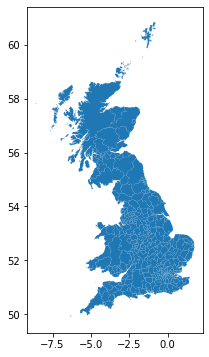

In [16]:
counties.plot(figsize=(10,6))

In [17]:
counties.shape

(380, 7)

In [18]:
df.shape

(325, 5)

Up to the data that has been imported, two dataframes were merged into one according to 'primary/foreign keys' from specified columns.

In [19]:
england = pd.merge(df, counties, how="left", left_on= ['LA_code'], right_on=['lad15cd'])

In [20]:
england = gpd.GeoDataFrame(england)

In [21]:
england

,PHE_Centre,LA_code,LA_name,Count_of_outlets,"Rate_per_100,000_population",objectid,lad15cd,lad15nm,lad15nmw,st_areashape,st_lengthshape,geometry
0,East Midlands,E07000032,Amber Valley,97,78.262413,72.0,E07000032,Amber Valley,,2.654379e+08,109036.228207,"POLYGON ((-1.49439 53.13244, -1.49537 53.13396..."
1,East Midlands,E07000170,Ashfield,104,84.892415,193.0,E07000170,Ashfield,,1.095579e+08,69174.669912,"POLYGON ((-1.28874 53.17140, -1.28876 53.17146..."
2,East Midlands,E07000171,Bassetlaw,85,74.467992,194.0,E07000171,Bassetlaw,,6.378039e+08,159735.840448,"MULTIPOLYGON (((-0.92514 53.49440, -0.92678 53..."
3,East Midlands,E07000129,Blaby,49,51.121011,158.0,E07000129,Blaby,,1.304687e+08,100819.772495,"POLYGON ((-1.19952 52.66435, -1.19968 52.66440..."
4,East Midlands,E07000033,Bolsover,67,86.838183,73.0,E07000033,Bolsover,,1.603346e+08,96238.990838,"POLYGON ((-1.30381 53.31289, -1.30464 53.31295..."
...,...,...,...,...,...,...,...,...,...,...,...,...
320,Yorkshire and Humber,E07000168,Scarborough,171,158.324538,191.0,E07000168,Scarborough,,8.165408e+08,243106.094928,"MULTIPOLYGON (((-0.79073 54.55897, -0.79084 54..."
321,Yorkshire and Humber,E07000169,Selby,48,56.235721,192.0,E07000169,Selby,,5.993108e+08,264868.959913,"MULTIPOLYGON (((-1.25142 53.93546, -1.25150 53..."
322,Yorkshire and Humber,E08000019,Sheffield,660,117.073378,276.0,E08000019,Sheffield,,3.679300e+08,132837.042147,"POLYGON ((-1.69946 53.50280, -1.69952 53.50280..."
323,Yorkshire and Humber,E08000036,Wakefield,396,119.500632,292.0,E08000036,Wakefield,,3.386197e+08,109447.457379,"POLYGON ((-1.29593 53.73949, -1.29610 53.73951..."


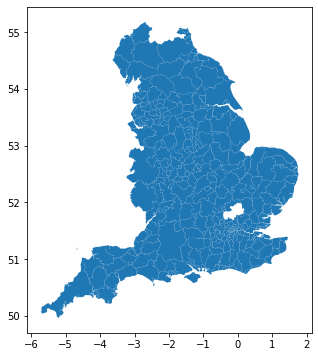

In [23]:
england.plot(figsize=(10,6))

In [24]:
england

,PHE_Centre,LA_code,LA_name,Count_of_outlets,"Rate_per_100,000_population",objectid,lad15cd,lad15nm,lad15nmw,st_areashape,st_lengthshape,geometry
0,East Midlands,E07000032,Amber Valley,97,78.262413,72.0,E07000032,Amber Valley,,2.654379e+08,109036.228207,"POLYGON ((-1.49439 53.13244, -1.49537 53.13396..."
1,East Midlands,E07000170,Ashfield,104,84.892415,193.0,E07000170,Ashfield,,1.095579e+08,69174.669912,"POLYGON ((-1.28874 53.17140, -1.28876 53.17146..."
2,East Midlands,E07000171,Bassetlaw,85,74.467992,194.0,E07000171,Bassetlaw,,6.378039e+08,159735.840448,"MULTIPOLYGON (((-0.92514 53.49440, -0.92678 53..."
3,East Midlands,E07000129,Blaby,49,51.121011,158.0,E07000129,Blaby,,1.304687e+08,100819.772495,"POLYGON ((-1.19952 52.66435, -1.19968 52.66440..."
4,East Midlands,E07000033,Bolsover,67,86.838183,73.0,E07000033,Bolsover,,1.603346e+08,96238.990838,"POLYGON ((-1.30381 53.31289, -1.30464 53.31295..."
...,...,...,...,...,...,...,...,...,...,...,...,...
320,Yorkshire and Humber,E07000168,Scarborough,171,158.324538,191.0,E07000168,Scarborough,,8.165408e+08,243106.094928,"MULTIPOLYGON (((-0.79073 54.55897, -0.79084 54..."
321,Yorkshire and Humber,E07000169,Selby,48,56.235721,192.0,E07000169,Selby,,5.993108e+08,264868.959913,"MULTIPOLYGON (((-1.25142 53.93546, -1.25150 53..."
322,Yorkshire and Humber,E08000019,Sheffield,660,117.073378,276.0,E08000019,Sheffield,,3.679300e+08,132837.042147,"POLYGON ((-1.69946 53.50280, -1.69952 53.50280..."
323,Yorkshire and Humber,E08000036,Wakefield,396,119.500632,292.0,E08000036,Wakefield,,3.386197e+08,109447.457379,"POLYGON ((-1.29593 53.73949, -1.29610 53.73951..."


Since with geopandas packages it is possible to plot geojson data. Also matplotlib will be installed and imported just to present legend more user friendly. Bellow is the presented density of fast food outlets per 100k citizens.

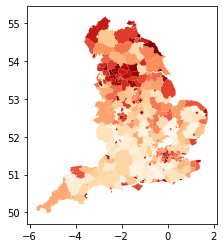

In [34]:
england.plot(column='Rate_per_100,000_population', cmap='OrRd')

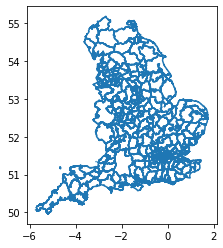

In [27]:
england.boundary.plot()

Up to the data visualization that was presented next step would be to also present socioeconomic aspects of each county. Afterwards, it is also possible to find causality between different socioeconomic groups, radius of fast-food outlets and i.e. cardiovascular diseases or Type B Diabetes.